Pre processing of the brain MRI images: Intensity normalisation, Bias field correction, Denoising


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from pathlib import Path
from utils import *

notebooks_path = Path.cwd()
repo_path = notebooks_path.parent
print(f'current directory is: {notebooks_path}')

current directory is: d:\VS_Projects\MISA_FINAL_PROJECT\notebooks


In [2]:
# Import data
tr_l_p = ["01","03","04","05","06","07","08","09","16","18"]
val_l_p = ["11","12","13","14","17"]
test_l_p = ["02","10","15"]

inputImage = read_image(repo_path, "01", "Training_Set", images=True)
inputImage_array = sitk.GetArrayFromImage(inputImage)

Perform preprocessing on 1 image:

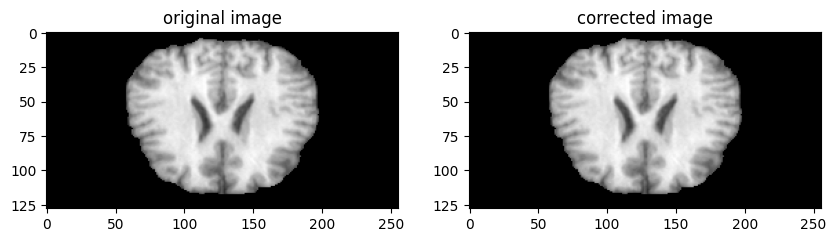

In [9]:
# show corrected image and original image
corrected_array = sitk.GetArrayFromImage(bias_correct(inputImage))
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
# add title
plt.title('original image')
plt.imshow(inputImage_array[150,:,:], cmap='gray')
plt.subplot(1,2,2)
plt.title('corrected image')
plt.imshow(corrected_array[150,:,:], cmap='gray')

(array([7.241139e+06, 2.500000e+01, 1.760000e+02, 3.160000e+02,
        7.760000e+02, 9.270000e+02, 1.878000e+03, 1.764000e+03,
        3.514000e+03, 3.906000e+03, 8.374000e+03, 9.934000e+03,
        1.318600e+04, 2.191000e+04, 1.824100e+04, 2.642200e+04,
        2.133000e+04, 3.058000e+04, 2.573900e+04, 3.964700e+04,
        3.594400e+04, 5.949900e+04, 5.461500e+04, 8.571700e+04,
        6.962700e+04, 7.010600e+04, 8.963100e+04, 6.211900e+04,
        7.756000e+04, 5.285700e+04, 6.504800e+04, 5.188800e+04,
        7.229200e+04, 3.955700e+04, 2.549500e+04, 5.577000e+03,
        1.260000e+03, 2.300000e+01, 3.000000e+00, 0.000000e+00,
        0.000000e+00, 2.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([-0.38538209, -0.27233621, -0.15929032, -0.04624444,  0.06680144,
         0.17984732,  0.29289321,  0.40593909,  0.51898497,  0.63203086,
         0.74507674,  0.85812262,  0.9711685 ,  

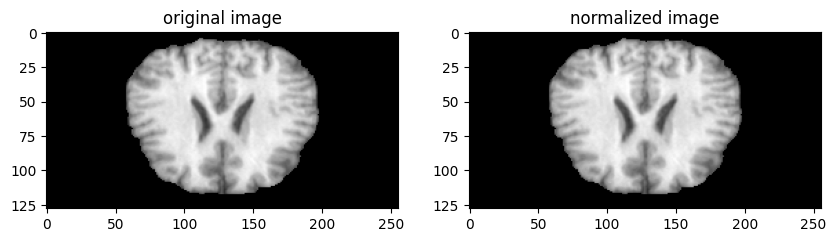

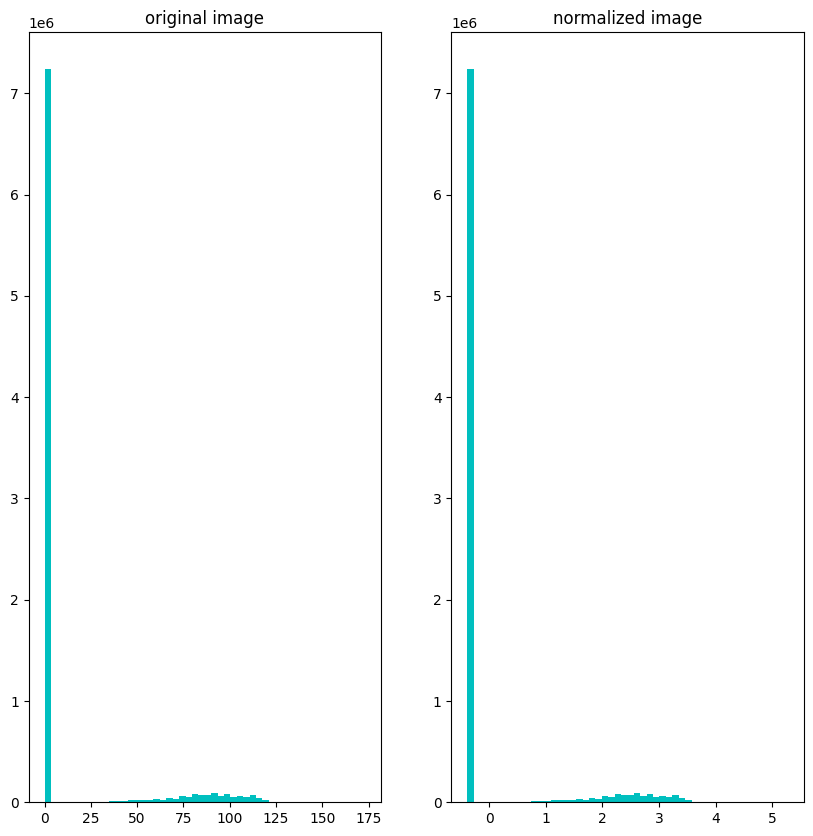

In [10]:
# show normalized image and original image
normalized_array = sitk.GetArrayFromImage(intensity_normalize(inputImage))
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
# add title
plt.title('original image')
plt.imshow(inputImage_array[150,:,:], cmap='gray')
plt.subplot(1,2,2)
plt.title('normalized image')
plt.imshow(normalized_array[150,:,:], cmap='gray')

# show the histogram of original image and normalized image
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('original image')
plt.hist(inputImage_array.flatten(), bins=50, color='c')
plt.subplot(1,2,2)
plt.title('normalized image')
plt.hist(normalized_array.flatten(), bins=50, color='c')


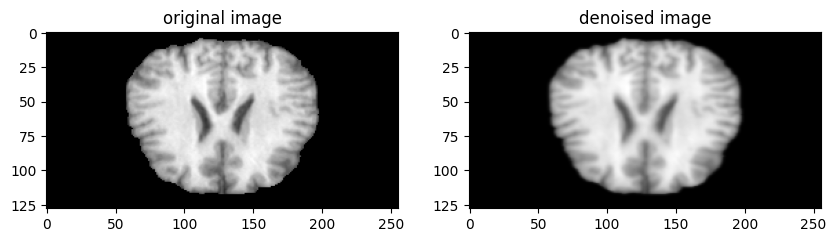

In [11]:
# show denoised image and original image
denoised_array = sitk.GetArrayFromImage(denoise(inputImage))
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
# add title
plt.title('original image')
plt.imshow(inputImage_array[150,:,:], cmap='gray')
plt.subplot(1,2,2)
plt.title('denoised image')
plt.imshow(denoised_array[150,:,:], cmap='gray')


Perform preprocessing on training and validation images:

In [7]:
for i in tr_l_p: 
    file_path = str(repo_path / "data" / "preprocessed" / "training")
    inputImage_path = str(repo_path / 'data' / 'Training_Set' / f'IBSR_{i}' / f'IBSR_{i}.nii.gz')

    corrected_array = sitk.GetArrayFromImage(bias_correct(inputImage))
    normalized_array = sitk.GetArrayFromImage(intensity_normalize(inputImage))
    denoised_array = sitk.GetArrayFromImage(denoise(inputImage))
    save_as_nifti(corrected_array, file_path, inputImage_path)

RuntimeError: Exception thrown in SimpleITK WriteImage: C:\dafne\SimpleElastix\Code\IO\src\sitkImageFileWriter.cxx:212:
sitk::ERROR: Unable to determine ImageIO writer for "d:\VS_Projects\MISA_FINAL_PROJECT\data\preprocessed\training"